# 과제1: tensorflow를 이용한 NN 밑바닥부터 구현
input feature가 100개이고,  
hidden layer가 2개이고 neuron이 각각 50,10개이고,  
output이 5개인 NN를 구현해 보자  
* hidden layer는 relu를 activation function으로, output layer는 softmax를 activation function으로 사용

In [220]:
import tensorflow as tf
import numpy as np

In [221]:
n_x = 100
n_h1 = 50
n_h2 = 10
n_y = 5

In [222]:
# Simulate train set
m = 500

x_train=np.random.randn(m,n_x).astype(np.float32)
y_train=np.zeros((m,n_y)).astype(np.float32)
y_train[np.arange(m),np.random.randint(n_y,size=m)]=1

print(x_train)
print(y_train)

[[-0.7238938   3.2138875  -2.229178   ... -0.22941966 -1.1428254
   1.2784419 ]
 [ 0.16345489 -0.41942927 -0.19510253 ... -0.5672645  -0.24349454
  -0.22516721]
 [ 0.4202599   0.34894583  1.131696   ...  0.6526868   0.6493977
   0.7088407 ]
 ...
 [ 0.24940738 -0.18150933 -0.1419899  ...  1.5134     -0.84121644
  -0.02064436]
 [ 1.0270381   0.41900668 -0.09216513 ...  1.221122   -0.93901634
  -1.1094363 ]
 [-0.04016334 -1.5946822  -0.20678306 ... -0.85441285  1.3012509
  -1.1345112 ]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [241]:
w1=tf.Variable(1e-3*np.random.randn(n_x,n_h1).astype(np.float32),name="w1")
## 코드를 작성해 보세요 ##
w2=tf.Variable(1e-3*np.random.randn(n_h1,n_h2).astype(np.float32),name="w2")
w3=tf.Variable(1e-3*np.random.randn(n_h2,n_y).astype(np.float32),name="w3")

* forward propagation을 통해 prediction 값을 구하고, loss를 구하는 function을 만들어 봅시다

In [244]:
def forward(x):
    z1=tf.matmul(x,w1)
    a1=tf.nn.relu(z1)
    ## 코드를 작성해 보세요 ##
    z2=tf.matmul(a1,w2)
    a2=tf.nn.relu(z2)
    z3=tf.matmul(a2,w3)
    a3=tf.sigmoid(z3)
    predictions =a3
    
    return predictions

def loss_fn(predictions, y):
    loss= -tf.reduce_sum(y*tf.math.log(predictions))
    return loss    
    

In [245]:
loss_fn(forward(x_train),y_train).numpy()

346.5737

* backpropagation & update parameters

In [249]:
learning_rate=1e-2
optimizer=tf.keras.optimizers.Adam(learning_rate)

def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = forward(x)
        loss = loss_fn(predictions, y)
    ## 코드를 작성해 보세요 ## (hint: tape.gradient를 구글링 해보세요)
    gradient = tape.gradient(loss,[w1,w2,w3])
    # optimizer와 위에서 구한 경사도를 이용해 가중치들을 업데이트 합니다.
    optimizer.apply_gradients(zip(gradient, [w1, w2, w3]))
    return loss, w1, w2, w3


* 간단하게 train loop를 작성해 loss가 줄어나가는지 확인해 봅시다.

In [250]:
import tf.GradientTape() as tape 
tape.gradient(forward(x_train),loss_fn(forward(x_train),y_train))

SyntaxError: ignored

In [251]:
loss_list = []

for step in range(10): 
    loss, w1, w2, w3 = train_step(x_train, y_train)
    loss_list.append(loss.numpy())
    
print(loss_list)

[346.5737, 346.38602, 345.35498, 342.54776, 336.75427, 326.74905, 311.31223, 289.42368, 260.5485, 225.01964]


# 과제2: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [201]:
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [202]:
x_train.shape 

(60000, 28, 28)

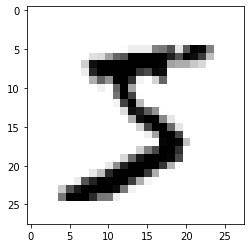

In [203]:
plt.imshow(x_train[0], cmap='binary')

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [204]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

TypeError: ignored

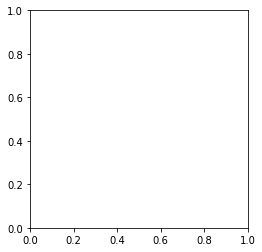

In [107]:
plt.imshow(x_train[0]).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [205]:
y_train.shape

(60000,)

In [206]:
# show MNIST label for above data
y_train[0]

5

In [207]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [208]:
np.unique((y_train))

array([0., 1.], dtype=float32)

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [209]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [215]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
from tensorflow.keras import layers
inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(256, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam",
              metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [216]:
model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_71 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_72 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_73 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [217]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3798 - accuracy: 0.8877
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0845 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0303 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

95%이상의 성능을 가진 모델을 만들면 완성!

In [218]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 0s - loss: 0.1013 - accuracy: 0.9781

Accuracy: 0.9781000018119812


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)